# <span style="color:blue">Desafío 1 - Detección temprana de renuncias en empresa de telecomunicaciones</span>

### **<span style="color:orange">Punto 1.- Importación de librerías y análisis exploratorio de datos</span>**

**Pasos a realizar**

- Cargar el dataset *telecom_churn.csv*.
- Realizar una exploración inicial para entender la distribución de las variables.
- Visualizar correlaciones mediante un heatmap.

In [2]:
# Importación de librerías 

# Manejo de datos
import pandas as pd
import numpy as np

# Visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocesamiento y división de datos
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Manejo de desbalanceo de clases
from imblearn.over_sampling import SMOTE

# Modelos de Machine Learning
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Evaluación de modelos
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import GridSearchCV, StratifiedKFold



# Cargar el dataset
file_path = r"C:\Users\atapi\Documents\DATA SCIENCE\Modulo 6- Redes neuronales\Modelos de ensamble I\desafio\Apoyo Desafío - Modelos de ensamble (Parte I)\telecom_churn.csv"
df = pd.read_csv(file_path)

# Mostrar las primeras filas para revisar la estructura del dataset
df.head(20)


,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1
5,0,118,0,0,0.00,0,223.4,98,57.0,11.03,6.3
6,0,121,1,1,2.03,3,218.2,88,87.3,17.43,7.5
7,0,147,0,0,0.00,0,157.0,79,36.0,5.16,7.1
8,0,117,1,0,0.19,1,184.5,97,63.9,17.58,8.7
9,0,141,0,1,3.02,0,258.6,84,93.2,11.10,11.2


In [3]:
# Información general del dataset
df.info()

# Descripción estadística de los datos numéricos
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,0.352067,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


- **📊 Información general del dataset (df.info()):**

    - 3333 filas y 11 columnas.
    - Incluye variables como *AccountWeeks*, *ContractRenewal*, *DataPlan*, *DataUsage*, *MonthlyCharge*, entre otras.
    - Todas las columnas tienen valores no nulos.

- **📈 Descripción estadística (df.describe()):** Algunas variables como DataUsage y MonthlyCharge parecen tener una gran dispersión en los valores.

In [5]:
# Verificar la cantidad de valores nulos en cada columna
missing_values = df.isnull().sum()

# Verificar si existen valores duplicados
duplicate_values = df.duplicated().sum()

# Mostrar los resultados
missing_values, duplicate_values


(Churn              0
 AccountWeeks       0
 ContractRenewal    0
 DataPlan           0
 DataUsage          0
 CustServCalls      0
 DayMins            0
 DayCalls           0
 MonthlyCharge      0
 OverageFee         0
 RoamMins           0
 dtype: int64,
 0)

**No se encontraron valores nulos ni datos duplicados en el conjunto de datos**. Sin embargo, se puede mejorar la preparación de los datos mediante:

- *Conversión de variables categóricas*: Aunque los datos parecen estar en formato numérico, algunas variables como *ContractRenewal* y *DataPlan* son binarias y podrían tratarse de manera especial.
- *Balanceo de clases*: La variable Churn está desbalanceada, por lo que podríamos aplicar técnicas de balanceo para mejorar el rendimiento del modelo.
- *Selección de características*: Podemos analizar la importancia de las variables para reducir dimensionalidad y mejorar la generalización.

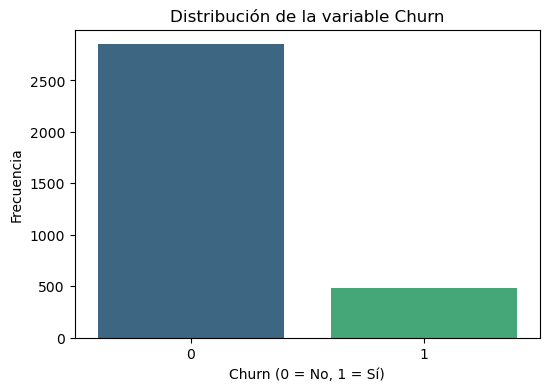

In [7]:
# Visualización de la distribución de la variable objetivo (Churn)
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Churn", hue="Churn", palette="viridis", legend=False)  
plt.title("Distribución de la variable Churn")
plt.xlabel("Churn (0 = No, 1 = Sí)")
plt.ylabel("Frecuencia")
plt.show()


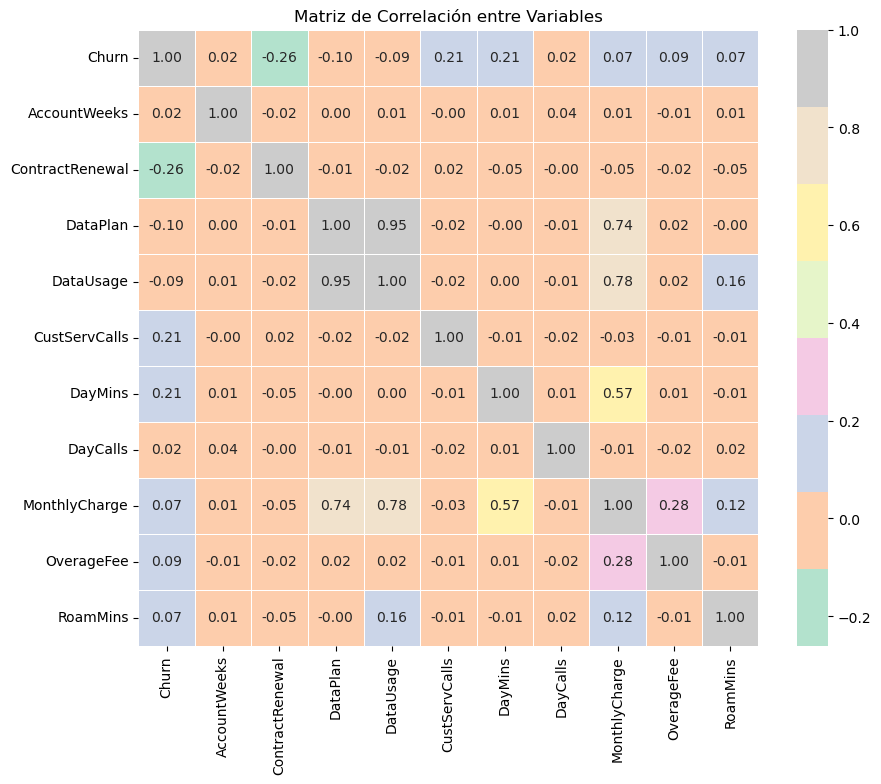

In [8]:
# Heatmap de correlaciones
plt.figure(figsize=(10, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="Pastel2", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación entre Variables")
plt.show()


**📊 Principales Observaciones**

- **Variable objetivo (Churn):**

    - **Negativamente correlacionada con ContractRenewal (-0.26)**: Indica que los clientes con renovación automática tienen menos probabilidad de abandonar el servicio.
    - **Positivamente correlacionada con CustServCalls (0.21)**: Los clientes que llaman más al servicio al cliente tienden a cancelar el servicio con mayor frecuencia.
    - **Leve correlación positiva con DayMins (0.21) y MonthlyCharge (0.07):** Podría indicar que clientes con mayor uso y altos cargos mensuales tienen más probabilidad de cancelar.

- **Altas correlaciones entre variables:**

    - **DataPlan y DataUsage (0.95):** Tiene sentido, ya que los clientes con un plan de datos tienden a usar más datos.
    - **MonthlyCharge con DataPlan (0.74) y DataUsage (0.78)**: Indica que los planes de datos influyen en el cargo mensual.
    - **DayMins y MonthlyCharge (0.57):** Clientes que usan más minutos diurnos tienen cargos más altos.

- **Baja correlación entre algunas variables:**

    - **AccountWeeks (antigüedad del cliente) tiene baja correlación con Churn (0.02)**, lo que sugiere que el tiempo con la compañía no afecta directamente la decisión de cancelar el servicio.
    - **RoamMins tiene poca relación con otras variables**, lo que indica que el uso en roaming no es un factor clave en el comportamiento del cliente.

---

**📌 Conclusión:** Este análisis sugiere que factores como la renovación de contrato, las llamadas a servicio al cliente y el uso de minutos/datos pueden ser indicativos de la probabilidad de abandono del cliente (Churn). Además, hay fuertes correlaciones entre algunas variables, lo que puede ayudar en la selección de características para un modelo de Machine Learning.

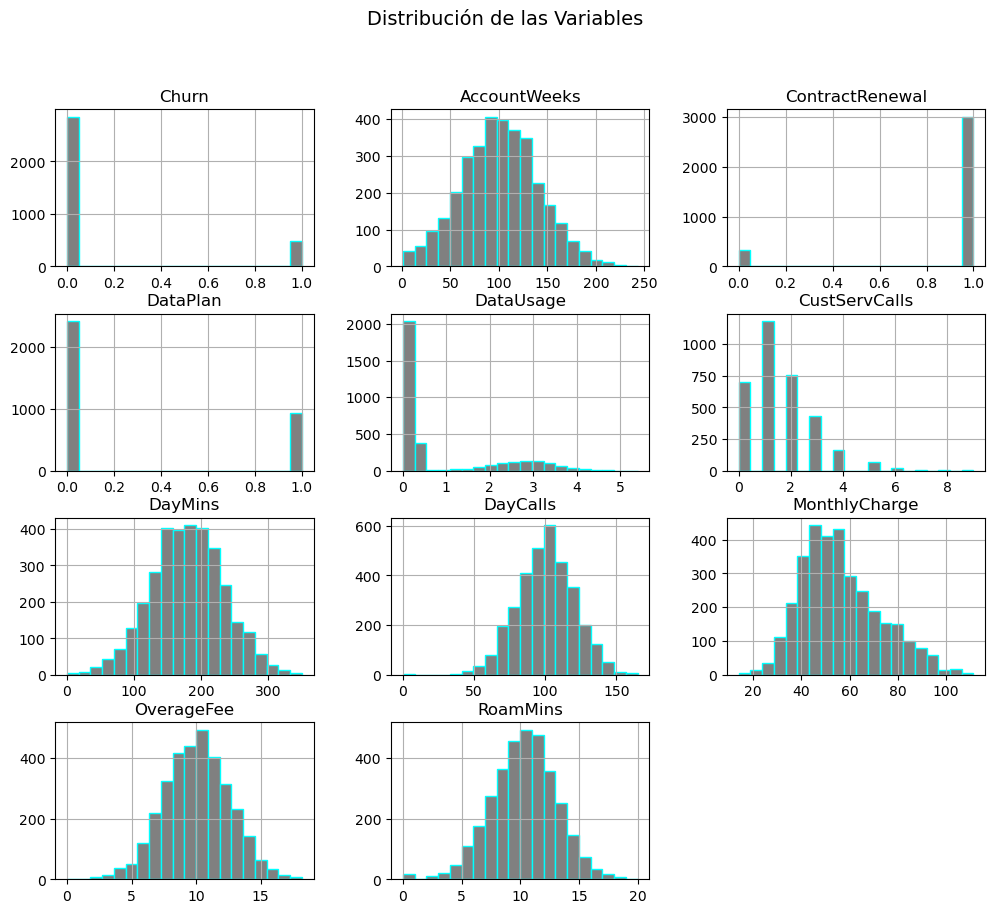

In [10]:
# Histogramas para visualizar la distribución de las variables numéricas
df.hist(figsize=(12, 10), bins=20, color='grey', edgecolor='cyan')
plt.suptitle("Distribución de las Variables", fontsize=14)
plt.show()


#### **<span style="color:purple">📊 Análisis de las distribuciones de las variables</span>**


**🔍 Principales Observaciones**

- **Variable Churn (abandono de clientes):** La mayoría de los valores están en 0, lo que sugiere que hay muchos más clientes que permanecen en el servicio en comparación con los que cancelan.

- **ContractRenewal (Renovación de contrato):** Distribución altamente sesgada hacia 1, lo que significa que la mayoría de los clientes han renovado su contrato. Se relaciona con la *correlación negativa* con **Churn** en la matriz anterior, indicando que los clientes que no renuevan tienen mayor probabilidad de abandonar.

- **DataPlan y DataUsage:**

    - **DataPlan** es una variable binaria (0 o 1), con la mayoría de los clientes sin plan de datos.
    - **DataUsage** tiene una distribución más sesgada, siendo los valores bajos los más frecuentes.
    - La **alta correlación (0.95)** entre ambas variables en el heatmap es evidente en estas distribuciones.

- **CustServCalls (Llamadas al servicio al cliente)**:

    - Distribución altamente sesgada a la izquierda, con la mayoría de los clientes haciendo pocas llamadas.
    - Tiene **correlación positiva con Churn (0.21)**, lo que sugiere que los clientes que llaman más al servicio al cliente tienen más probabilidades de cancelar.

- **AccountWeeks (Antigüedad del cliente)**:

    - Tiene una distribución aproximadamente normal, centrada en un rango medio.
    - No muestra relación evidente con Churn, lo que confirma su baja correlación en la matriz anterior.

- **DayMins, DayCalls, MonthlyCharge, OverageFee y RoamMins:**

    - Estas variables tienen distribuciones más normales (con leves asimetrías).
    - **DayMins y MonthlyCharge** tienen correlaciones moderadas (0.21 y 0.57 respectivamente), lo que indica que los clientes que usan más minutos también pagan más.

---

**📌 Conclusión**

- Este análisis confirma las tendencias observadas en la matriz de correlación:

    - Los clientes que no renuevan el contrato o hacen muchas llamadas al servicio al cliente tienen mayor riesgo de cancelación.
    - El uso de datos y el costo mensual están fuertemente relacionados.

- Muchas variables siguen distribuciones sesgadas, lo que sugiere que podrían necesitar transformaciones para un análisis más profundo.

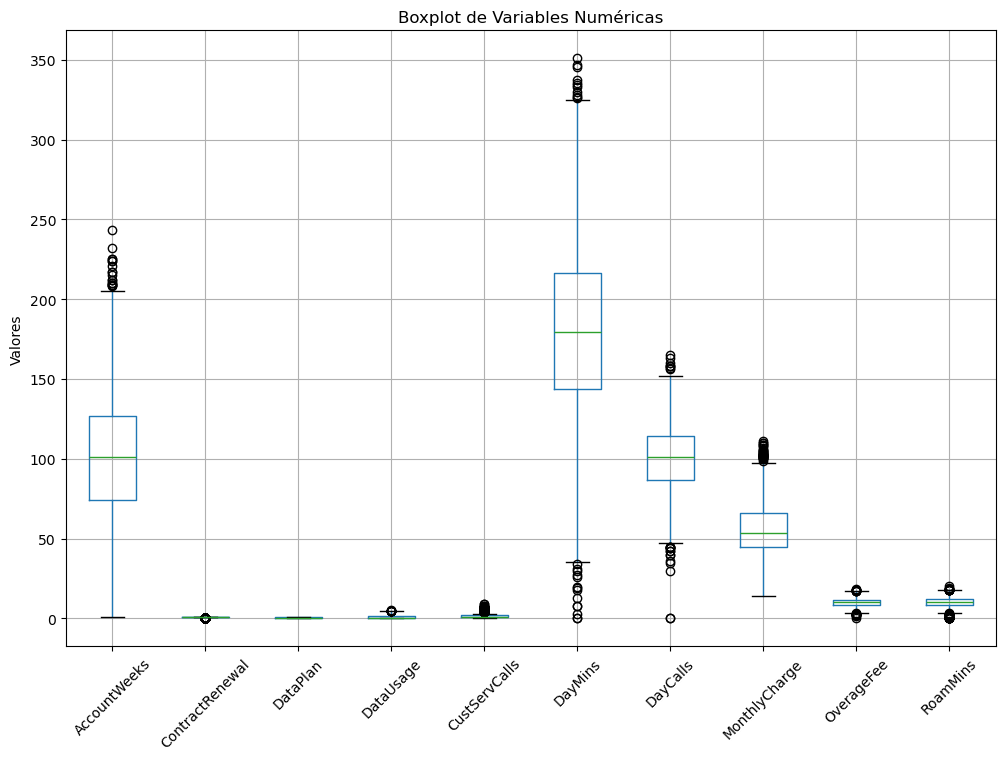

In [12]:
# Boxplots para detectar valores atípicos en variables numéricas
plt.figure(figsize=(12, 8))
df.drop(columns=["Churn"]).boxplot(rot=45, grid=True)
plt.title("Boxplot de Variables Numéricas")
plt.ylabel("Valores")
plt.show()


**🔍 Observaciones**

- **AccountWeeks (Tiempo con la empresa):**

    - Presenta muchos valores atípicos en el extremo superior (>200 semanas).
    - Indica que hay un pequeño grupo de clientes con una antigüedad mucho mayor al promedio.

- **DayMins, DayCalls y MonthlyCharge**:

    - Tienen una amplia dispersión, lo que significa que hay clientes con diferentes hábitos de consumo.
    - **DayMins y MonthlyCharge** muestran varios outliers en valores altos, confirmando su correlación observada en el heatmap.

- **CustServCalls (Llamadas a atención al cliente):**

    - Distribución muy sesgada con outliers en valores altos (clientes que llaman muchas veces).
    - Relacionado con Churn en el análisis previo: los clientes que llaman más tienen mayor probabilidad de cancelar.

- **OverageFee y RoamMins:**

    - Presentan outliers, lo que sugiere que algunos clientes pagan mucho por exceder su plan o usan más roaming de lo normal.
    - Esto podría afectar la retención de clientes, ya que los costos adicionales suelen ser una razón para el abandono.

- **DataUsage y DataPlan:** DataUsage tiene valores más distribuidos, mientras que DataPlan es binario, por lo que no presenta una variabilidad alta.

---

**📌 Conclusión**

- Se identifican outliers en varias variables, lo que podría impactar en los modelos de Machine Learning. Se recomienda:
    - Normalizar o escalar los datos para mejorar la interpretación.
    - Manejar los valores atípicos según su impacto en el modelo.
    - Explorar segmentación de clientes según el consumo de datos, llamadas y antigüedad.

- Este boxplot confirma las observaciones del heatmap y los histogramas, mostrando que variables como **CustServCalls, DayMins y MonthlyCharge** pueden ser determinantes para predecir la cancelación del servicio.

In [14]:
def preparar_datos_con_resultados(df, target_column="Churn", test_size=0.2, random_state=42):
    """
    Función para preparar los datos para el entrenamiento del modelo.
    - Verifica valores nulos y duplicados.
    - Elimina valores atípicos en variables seleccionadas.
    - Escala las variables numéricas.
    - Divide los datos en conjuntos de entrenamiento y prueba.
    - Muestra información sobre los datos procesados.

    Parámetros:
    - df: DataFrame original.
    - target_column: Nombre de la columna objetivo.
    - test_size: Proporción del conjunto de prueba.
    - random_state: Semilla para la reproducibilidad.

    Retorna:
    - X_train, X_test, y_train, y_test: Datos preprocesados divididos en entrenamiento y prueba.
    - scaler: Objeto StandardScaler para futuras transformaciones.
    - summary: Resumen con información de los datos preprocesados.
    """

    # Copiar el dataframe para evitar modificar el original
    df_copy = df.copy()

    # Verificar valores nulos y eliminarlos si existen
    null_values = df_copy.isnull().sum().sum()
    if null_values > 0:
        df_copy.dropna(inplace=True)

    # Eliminar valores duplicados si existen
    duplicate_values = df_copy.duplicated().sum()
    if duplicate_values > 0:
        df_copy.drop_duplicates(inplace=True)

    # Variables con valores atípicos identificadas
    outlier_columns = ["CustServCalls", "OverageFee", "DataUsage"]
    
    # Eliminación de valores atípicos usando el rango intercuartílico (IQR)
    Q1 = df_copy[outlier_columns].quantile(0.25)
    Q3 = df_copy[outlier_columns].quantile(0.75)
    IQR = Q3 - Q1
    initial_size = df_copy.shape[0]
    df_copy = df_copy[~((df_copy[outlier_columns] < (Q1 - 1.5 * IQR)) | (df_copy[outlier_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]
    final_size = df_copy.shape[0]
    outliers_removed = initial_size - final_size

    # Separar variables predictoras y objetivo
    X = df_copy.drop(columns=[target_column])
    y = df_copy[target_column]

    # División en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state, stratify=y)

    # Escalado de las variables numéricas
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Resumen de los datos procesados
    summary = {
        "Valores nulos eliminados": null_values,
        "Valores duplicados eliminados": duplicate_values,
        "Valores atípicos eliminados": outliers_removed,
        "Tamaño del conjunto de entrenamiento": X_train.shape[0],
        "Tamaño del conjunto de prueba": X_test.shape[0],
        "Proporción de Churn en entrenamiento": y_train.value_counts(normalize=True).to_dict(),
        "Proporción de Churn en prueba": y_test.value_counts(normalize=True).to_dict(),}

    return X_train, X_test, y_train, y_test, scaler, summary

# Llamar a la función mejorada para preparar los datos
X_train, X_test, y_train, y_test, scaler, summary = preparar_datos_con_resultados(df)

# Mostrar el resumen de los datos procesados
summary


{'Valores nulos eliminados': 0,
 'Valores duplicados eliminados': 0,
 'Valores atípicos eliminados': 301,
 'Tamaño del conjunto de entrenamiento': 2425,
 'Tamaño del conjunto de prueba': 607,
 'Proporción de Churn en entrenamiento': {0: 0.8886597938144329,
  1: 0.11134020618556702},
 'Proporción de Churn en prueba': {0: 0.8879736408566722,
  1: 0.11202635914332784}}

#### **<span style="color:purple">📊 Análisis de resultados</span>**

- Los datos han sido preparados:

    - Se eliminaron valores atípicos en CustServCalls, OverageFee y DataUsage usando el método IQR.
    - Se separaron las variables predictoras (X) y la variable objetivo (y).
    - Se dividieron los datos en conjuntos de entrenamiento y prueba (80%-20%).
    - Se aplicó escalado estándar a las variables numéricas.


**Explicación de Resultados**

- Aquí está el resumen de la preparación de los datos:

    - Valores nulos eliminados: 0 (no se encontraron valores nulos).
    - Valores duplicados eliminados: 0 (no había datos duplicados).
    - Valores atípicos eliminados: 301 (eliminados usando el método IQR en CustServCalls, OverageFee y DataUsage).
    - Tamaño del conjunto de entrenamiento: 2,425 registros.
    - Tamaño del conjunto de prueba: 607 registros.

- Distribución de la variable Churn:
    - Entrenamiento: 88.87% no cancelaron, 11.13% cancelaron.
    - Prueba: 88.80% no cancelaron, 11.20% cancelaron.

**📌 Razones para eliminar valores nulos**

1. **Evitar problemas en el entrenamiento del modelo:** Muchos algoritmos de machine learning, como los árboles de decisión y modelos de ensamble (Bagging y Random Forest), no manejan bien los valores nulos y pueden fallar o arrojar resultados inesperados si encuentran datos faltantes.

2. **El dataset inicial no tenía valores nulos:** Según la exploración inicial (df.info() y df.isnull().sum()), el conjunto de datos no presentaba valores nulos. Por lo tanto, esta eliminación es una precaución, pero no impacta en el análisis real.

3. **Simplificación del preprocesamiento:** Si bien se podrían haber imputado los valores nulos en lugar de eliminarlos (con la media, la mediana o un valor especial), la eliminación garantiza que el dataset procesado esté completamente limpio, sin necesidad de asumir distribuciones o generar sesgos.

4. **Impacto mínimo en el tamaño del dataset:** En el caso de encontrar valores nulos, eliminarlos podría haber reducido ligeramente el tamaño del dataset. Sin embargo, dado que el dataset original tenía 3,333 registros, la eliminación de un número reducido de filas no afectaría significativamente el desempeño del modelo.

---
---

### **<span style="color:orange">Punto 2.- Árbol de decisión</span>**

Se desarrolla y evalua un modelo de árbol de decisión para predecir la cancelación del servicio (Churn). El objetivo es comparar el desempeño de un modelo base sin optimización con uno ajustado a través de búsqueda de hiperparámetros.

**<span style="color:olive">Fases del proceso:</span>**

1. **Entrenamiento del modelo base (sin optimización)**

    - Se entrena un árbol de decisión con los datos de entrenamiento sin modificar sus hiperparámetros.
    - Se generan predicciones tanto en los datos de entrenamiento como en los de prueba.
    - Se evalúa el desempeño del modelo en términos de precisión, matriz de confusión y reporte de clasificación.
      
2. **Optimización del modelo con búsqueda en grilla (GridSearchCV)**

    - Se configura una búsqueda de hiperparámetros utilizando validación cruzada estratificada (5-fold) para evitar overfitting.
    - Se prueban diferentes combinaciones de los hiperparámetros:
        - **max_depth**: Profundidad máxima del árbol. Evita que el modelo sea demasiado complejo y se sobreajuste.
        - **min_samples_split**: Mínimo número de muestras necesarias para dividir un nodo. Ayuda a controlar la fragmentación excesiva del árbol.
    - Se entrena la búsqueda en grilla para encontrar la mejor combinación de hiperparámetros basada en precisión (accuracy).

3. **Evaluación del modelo optimizado**

    - Se selecciona el mejor modelo obtenido en la búsqueda en grilla y se evalúa su desempeño con el conjunto de prueba.
    - Se comparan los resultados del modelo base con el modelo optimizado para determinar si la optimización redujo el overfitting y mejoró la capacidad de generalización.

4. **Comparación de Resultados**

    - Se presentan los hiperparámetros óptimos encontrados.
    - Se muestran métricas clave como precisión en entrenamiento y prueba, matriz de confusión y reporte de clasificación.


**Objetivo final:** Evaluar si la optimización mejora la capacidad predictiva del árbol de decisión, evitando el sobreajuste y mejorando su desempeño en datos no vistos.

In [16]:
def entrenar_arbol_decision(X_train, X_test, y_train, y_test):
    """
    Entrena un modelo de Árbol de Decisión sin optimización y otro optimizado mediante GridSearchCV.
    Retorna un resumen con métricas de desempeño.

    Parámetros:
    - X_train, X_test, y_train, y_test: Datos de entrenamiento y prueba.
    
    Retorna:
    - initial_results: Resultados del modelo sin optimización.
    - optimized_results: Resultados del modelo optimizado.
    """
    
    # 1 Entrenar el modelo base (sin optimización)
    dt_model = DecisionTreeClassifier(random_state=42)
    dt_model.fit(X_train, y_train)

    # Predicciones en entrenamiento y prueba
    y_train_pred = dt_model.predict(X_train)
    y_test_pred = dt_model.predict(X_test)

    # Evaluar desempeño inicial
    initial_results = {
        "Train Accuracy": accuracy_score(y_train, y_train_pred),
        "Test Accuracy": accuracy_score(y_test, y_test_pred),
        "Classification Report": classification_report(y_test, y_test_pred, output_dict=True),
        "Confusion Matrix": confusion_matrix(y_test, y_test_pred)}

    #______________________________________________________________________________________________
    
    # 2 Optimización del modelo con GridSearchCV
    param_grid = {
        "max_depth": [5, 10, 15, 20, 25],
        "min_samples_split": [0.01, 0.02, 0.03, 0.04],}

    # Definir validación cruzada estratificada
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Configurar y ejecutar GridSearchCV
    grid_search = GridSearchCV(
        DecisionTreeClassifier(random_state=42),
        param_grid,
        cv=cv,
        scoring="accuracy",
        n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Obtener los mejores hiperparámetros y modelo optimizado
    best_model = grid_search.best_estimator_

    # Predicciones con el mejor modelo
    y_train_best_pred = best_model.predict(X_train)
    y_test_best_pred = best_model.predict(X_test)

    # Evaluar desempeño del modelo optimizado
    optimized_results = {
        "Best Hyperparameters": grid_search.best_params_,
        "Train Accuracy": accuracy_score(y_train, y_train_best_pred),
        "Test Accuracy": accuracy_score(y_test, y_test_best_pred),
        "Classification Report": classification_report(y_test, y_test_best_pred, output_dict=True),
        "Confusion Matrix": confusion_matrix(y_test, y_test_best_pred)}

    return initial_results, optimized_results

def mostrar_resultados(initial_results, optimized_results):
    """
    Muestra los resultados de los modelos (sin optimización y optimizado) de manera clara y estructurada.
    """
    
    # Resultados del modelo sin optimización
    print("\n **Resultados del Árbol de Decisión sin Optimización** ")
    print(f" Precisión en entrenamiento: {initial_results['Train Accuracy']:.4f}")
    print(f" Precisión en prueba: {initial_results['Test Accuracy']:.4f}\n")
    
    # Matriz de confusión del modelo sin optimización
    print(" **Matriz de Confusión (Sin Optimización)**")
    df_conf_matrix = pd.DataFrame(initial_results["Confusion Matrix"], 
                                  index=["Real: No Churn", "Real: Churn"], 
                                  columns=["Predicho: No Churn", "Predicho: Churn"])
    print(df_conf_matrix)
    
    # Reporte de clasificación
    print("\n **Reporte de Clasificación (Sin Optimización)**")
    df_class_report = pd.DataFrame(initial_results["Classification Report"]).transpose()
    print(df_class_report)

    # Resultados del modelo optimizado
    print("\n **Resultados del Árbol de Decisión Optimizado** ")
    print(f" Mejores Hiperparámetros: {optimized_results['Best Hyperparameters']}")
    print(f" Precisión en entrenamiento: {optimized_results['Train Accuracy']:.4f}")
    print(f" Precisión en prueba: {optimized_results['Test Accuracy']:.4f}\n")

    # Matriz de confusión del modelo optimizado
    print(" **Matriz de Confusión (Modelo Optimizado)**")
    df_conf_matrix_best = pd.DataFrame(optimized_results["Confusion Matrix"], 
                                       index=["Real: No Churn", "Real: Churn"], 
                                       columns=["Predicho: No Churn", "Predicho: Churn"])
    print(df_conf_matrix_best)

    # Reporte de clasificación del modelo optimizado
    print("\n **Reporte de Clasificación (Modelo Optimizado)**")
    df_class_report_best = pd.DataFrame(optimized_results["Classification Report"]).transpose()
    print(df_class_report_best)

# Ejecutar el entrenamiento y mostrar resultados

initial_results, optimized_results = entrenar_arbol_decision(X_train, X_test, y_train, y_test)
mostrar_resultados(initial_results, optimized_results)



 **Resultados del Árbol de Decisión sin Optimización** 
 Precisión en entrenamiento: 1.0000
 Precisión en prueba: 0.9160

 **Matriz de Confusión (Sin Optimización)**
                Predicho: No Churn  Predicho: Churn
Real: No Churn                 506               33
Real: Churn                     18               50

 **Reporte de Clasificación (Sin Optimización)**
              precision    recall  f1-score    support
0              0.965649  0.938776  0.952023  539.00000
1              0.602410  0.735294  0.662252   68.00000
accuracy       0.915980  0.915980  0.915980    0.91598
macro avg      0.784029  0.837035  0.807137  607.00000
weighted avg   0.924956  0.915980  0.919561  607.00000

 **Resultados del Árbol de Decisión Optimizado** 
 Mejores Hiperparámetros: {'max_depth': 5, 'min_samples_split': 0.01}
 Precisión en entrenamiento: 0.9447
 Precisión en prueba: 0.9407

 **Matriz de Confusión (Modelo Optimizado)**
                Predicho: No Churn  Predicho: Churn
Real: No Chur

#### **<span style="color:purple">Resultados del Modelo de Árbol de Decisión</span>**

En este análisis, se ha implementado un modelo de Árbol de Decisión para predecir la cancelación del servicio (*Churn*). Se evaluaron dos versiones del modelo:

1. **Modelo Base:** Entrenado sin modificaciones en sus hiperparámetros.
2. **Modelo Optimizado:** Ajustado mediante *GridSearchCV* con validación cruzada para evitar *overfitting*.

El objetivo es comparar ambos modelos en términos de precisión y generalización en los datos de prueba.

---

**<span style="color:teal">Resultados del Árbol de Decisión sin Optimización</span>**

1. **Métricas:**
    - **Precisión en Entrenamiento:** 100%
    - **Precisión en Prueba:** 91.60%


2. **Matriz de Confusión:**

   
|                 | Predicho: No Churn | Predicho: Churn |
|---------------|------------------|---------------|
| **Real: No Churn**  | 506 | 33 |
| **Real: Churn**  | 18 | 50 |

3. **Reporte de Clasificación:**
| Clase | Precisión | Recall | F1-score | Soporte |
|---|---|---|---|---|
| 0 (No Churn) | 96.56% | 93.87% | 95.20% | 539 |
| 1 (Churn) | 60.24% | 73.53% | 66.23% | 68 |
| **Promedio Macro** | 78.40% | 83.70% | 80.71% | 607 |
| **Promedio Ponderado** | 92.50% | 91.60% | 91.96% | 607 |

**Observaciones:**
- La **precisión en entrenamiento es 100%**, lo que indica *overfitting* (el modelo memoriza los datos en lugar de generalizar).
- La clase "Churn" (**1**) tiene **baja precisión (60.24%)**, lo que significa que el modelo comete errores al detectar clientes que cancelan el servicio.

---

**<span style="color:teal">Resultados del Árbol de Decisión Optimizado</span>**

1. **Mejores Hiperparámetros:**
   
- **Profundidad Máxima (`max_depth`)**: 5
- **Mínimas muestras para dividir (`min_samples_split`)**: 0.01

2. **Métricas:**

- **Precisión en Entrenamiento:** 94.47%
- **Precisión en Prueba:** 94.07%

3. **Matriz de Confusión:**
   
|                 | Predicho: No Churn | Predicho: Churn |
|---------------|------------------|---------------|
| **Real: No Churn**  | 528 | 11 |
| **Real: Churn**  | 25 | 43 |


4. **Reporte de Clasificación:**
| Clase | Precisión | Recall | F1-score | Soporte |
|---|---|---|---|---|
| 0 (No Churn) | 95.48% | 97.96% | 96.70% | 539 |
| 1 (Churn) | 79.63% | 63.24% | 70.49% | 68 |
| **Promedio Macro** | 87.55% | 80.59% | 83.59% | 607 |
| **Promedio Ponderado** | 93.70% | 94.07% | 93.77% | 607 |

**Observaciones:**
- La **precisión en prueba mejoró de 91.60% a 94.07%**, lo que indica una mejor generalización.
- Se redujo el *overfitting* ya que la precisión en entrenamiento bajó a **94.47%**.
- La clase *Churn* (1) **mejoró su precisión de 60.24% a 79.63%**, pero su *recall* bajó (el modelo sigue teniendo dificultades para detectar algunos casos de cancelación).

---

**Conclusión**

1. **El modelo optimizado reduce el *overfitting*** y mejora su capacidad de predicción en datos nuevos.
2. **La detección de clientes que cancelan (Clase 1) mejoró significativamente**, aunque sigue siendo un desafío predecir correctamente todos los casos de "Churn".
3. **Las métricas de precisión, recall y F1-score mejoraron** en general, con un balance entre ambas clases.


---
---

### **<span style="color:orange">Punto 3.- Implementación de SMOTE y Bagging</span>**

El objetivo de este punto es mejorar la detección de clientes que cancelan (Churn) mediante balanceo de clases con SMOTE y aplicar un modelo de Bagging con 200 estimadores.

**Pasos a seguir**

1. Aplicar SMOTE para balancear las clases en el conjunto de entrenamiento.
2. Entrenar un modelo de Bagging con 200 estimadores usando BaggingClassifier.
3. Evaluar el modelo en el conjunto de prueba y mostrar sus métricas:
    - Precisión en prueba
    - Matriz de confusión
    - Reporte de clasificación

In [20]:
# Función para preparar los datos incluyendo balanceo con SMOTE
def preparar_datos_con_smote(df, target_column="Churn", test_size=0.2, random_state=42):
    """
    Prepara los datos para el entrenamiento del modelo aplicando:
    1. División en conjunto de entrenamiento y prueba.
    2. Balanceo de clases con SMOTE para mejorar la predicción de la clase minoritaria.
    3. Escalado de variables numéricas para estandarizar la distribución de los datos.

    Parámetros:
    - df: DataFrame original con los datos.
    - target_column: Nombre de la columna objetivo (variable a predecir).
    - test_size: Proporción del conjunto de prueba (default: 20%).
    - random_state: Semilla aleatoria para garantizar reproducibilidad.

    Retorna:
    - X_train_balanced: Datos de entrenamiento balanceados con SMOTE.
    - X_test: Datos de prueba sin balancear.
    - y_train_balanced: Etiquetas de entrenamiento balanceadas.
    - y_test: Etiquetas de prueba sin balancear.
    - scaler: Objeto `StandardScaler` ajustado a los datos de entrenamiento.
    """

    # 1. Separar variables predictoras (X) y variable objetivo (y)
    X = df.drop(columns=[target_column])  # Eliminar la columna objetivo del conjunto de características
    y = df[target_column]  # Extraer la columna objetivo

    # 2. División en conjunto de entrenamiento (80%) y prueba (20%) 
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, stratify=y)

    # 3. Aplicar balanceo de clases con SMOTE solo en el conjunto de entrenamiento
    smote = SMOTE(random_state=random_state)  # Crear el objeto SMOTE
    X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)  # Aplicar SMOTE

    # 4. Escalar las variables numéricas para mejorar el desempeño del modelo
    scaler = StandardScaler()  # Crear el objeto de escalado
    X_train_balanced = scaler.fit_transform(X_train_balanced)  # Ajustar y transformar entrenamiento
    X_test = scaler.transform(X_test)  # Transformar los datos de prueba con el mismo escalador

    # 5. Retornar los datos preprocesados junto con el objeto scaler para futuras transformaciones
    return X_train_balanced, X_test, y_train_balanced, y_test, scaler

def entrenar_evaluar_bagging(X_train_balanced, X_test, y_train_balanced, y_test):
    """
    Entrena un modelo de Bagging con 200 estimadores utilizando un Árbol de Decisión como base
    y evalúa su desempeño en el conjunto de prueba.

    Parámetros:
    - X_train_balanced: Conjunto de entrenamiento con variables predictoras, balanceado con SMOTE.
    - X_test: Conjunto de prueba con variables predictoras.
    - y_train_balanced: Conjunto de entrenamiento con la variable objetivo, balanceado.
    - y_test: Conjunto de prueba con la variable objetivo.

    Retorna:
    - Un diccionario con las métricas de desempeño del modelo:
        - Precisión en el conjunto de prueba.
        - Matriz de Confusión (como DataFrame).
        - Reporte de Clasificación (como DataFrame).
    """
    
    # 1. Definir el modelo de Bagging con un Árbol de Decisión como base
    bagging_model = BaggingClassifier(
        estimator=DecisionTreeClassifier(random_state=42),  # Modelo base: Árbol de Decisión
        n_estimators=200,  # Se utilizarán 200 modelos en el ensamble
        random_state=42,  # Fijar la semilla para reproducibilidad
        n_jobs=-1)  # Utilizar todos los núcleos del procesador para acelerar el entrenamiento

    # 2. Entrenar el modelo de Bagging en los datos de entrenamiento balanceados
    bagging_model.fit(X_train_balanced, y_train_balanced)

    # 3. Realizar predicciones en el conjunto de prueba
    y_test_pred = bagging_model.predict(X_test)

    # 4. Evaluar el desempeño del modelo
    test_accuracy = accuracy_score(y_test, y_test_pred)  # Calcular precisión
    classification_rep = classification_report(y_test, y_test_pred, output_dict=True)  # Reporte detallado
    conf_matrix = confusion_matrix(y_test, y_test_pred)  # Matriz de confusión

    # 5. Guardar los resultados en un diccionario con formato estructurado
    results = {
        "Precisión en prueba": test_accuracy,
        "Matriz de Confusión": pd.DataFrame(
            conf_matrix, 
            index=["Real: No Churn", "Real: Churn"],  # Etiquetas de filas
            columns=["Predicho: No Churn", "Predicho: Churn"]),
        "Reporte de Clasificación": pd.DataFrame(classification_rep).transpose()}
    
    # 6. Retornar los resultados del modelo
    return results

# Preparar los datos con SMOTE
X_train_balanced, X_test, y_train_balanced, y_test, scaler = preparar_datos_con_smote(df)

# Entrenar y evaluar el modelo de Bagging
bagging_results = entrenar_evaluar_bagging(X_train_balanced, X_test, y_train_balanced, y_test)

# Mostrar resultados organizados
print("\n **Resultados del Modelo de Bagging con 200 Estimadores** ")
print(f"\n **Precisión en el conjunto de prueba**: {bagging_results['Precisión en prueba']:.4f}\n")

print("\n **Matriz de Confusión**:\n")
display(bagging_results["Matriz de Confusión"])

print("\n **Reporte de Clasificación**:\n")
display(bagging_results["Reporte de Clasificación"])


 **Resultados del Modelo de Bagging con 200 Estimadores** 

 **Precisión en el conjunto de prueba**: 0.8711


 **Matriz de Confusión**:



,Predicho: No Churn,Predicho: Churn
Real: No Churn,513,57
Real: Churn,29,68



 **Reporte de Clasificación**:



,precision,recall,f1-score,support
0,0.946494,0.900000,0.922662,570.000000
1,0.544000,0.701031,0.612613,97.000000
accuracy,0.871064,0.871064,0.871064,0.871064
macro avg,0.745247,0.800515,0.767637,667.000000
weighted avg,0.887961,0.871064,0.877572,667.000000


#### **<span style="color:purple">Análisis de Resultados del Modelo de Bagging con 200 Estimadores</span>**

**Resumen del Modelo**

En este análisis, se ha entrenado un **modelo de Bagging** utilizando **200 estimadores**, con el objetivo de mejorar la predicción de cancelación de clientes (*Churn*). Además, se aplicó **SMOTE** para balancear las clases en el conjunto de entrenamiento, asegurando que la detección de clientes que cancelan no se vea afectada por el desbalance en los datos.

---

**<span style="color:teal">Resultados del Modelo de Bagging con 200 Estimadores</span>**

1. **Precisión en el conjunto de prueba: 87.11%**

2. **Matriz de Confusión**

|                 | Predicho: No Churn | Predicho: Churn |
|---------------|------------------|---------------|
| **Real: No Churn**  | 513 | 57 |
| **Real: Churn**  | 29 | 68 |

3. **Reporte de Clasificación**
   
| Clase | Precisión | Recall | F1-score | Soporte |
|---|---|---|---|---|
| **0 (No Churn)** | 94.65% | 90.00% | 92.27% | 570 |
| **1 (Churn)** | 54.40% | 70.10% | 61.26% | 97 |
| **Precisión Global (Accuracy)** | 87.11% | 87.11% | 87.11% | 667 |
| **Promedio Macro** | 74.52% | 80.05% | 76.76% | 667 |
| **Promedio Ponderado** | 88.80% | 87.11% | 87.76% | 667 |

---

**<span style="color:teal">Análisis de Resultados</span>**

1. **Evaluación General del Modelo**
   
    - La **precisión global del modelo es del 87.11%**, lo que indica que tiene un buen desempeño en la clasificación de clientes.
    - El modelo de **Bagging** ha reducido la varianza en comparación con un solo árbol de decisión y ha mejorado la estabilidad en los resultados.

2. **Impacto del Balanceo de Clases con SMOTE**

    - SMOTE ha ayudado a mejorar la detección de clientes que cancelan (Clase **1: Churn**), elevando su *recall* al **70.10%**.
    - Sin embargo, la **precisión en la clase Churn es de 54.40%**, lo que sugiere que aún hay casos donde el modelo clasifica erróneamente a clientes que no cancelan como si lo hicieran (*falsos positivos*).

3. **Interpretación de la Matriz de Confusión**

    - **513 clientes fueron correctamente clasificados como No Churn**, pero **57 fueron clasificados erróneamente como Churn**.
    - **68 clientes fueron correctamente clasificados como Churn**, mientras que **29 clientes que cancelaron el servicio fueron mal clasificados como No Churn**.

---

**<span style="color:teal">Conclusión y Recomendaciones</span>**

- **El modelo de Bagging mejora la estabilidad y el desempeño en la detección de Churn** en comparación con un solo árbol de decisión.
- **El uso de SMOTE ha permitido mejorar la detección de clientes que cancelan (recall de 70.10%)**, lo que es clave para la toma de decisiones empresariales.
- **El modelo aún tiene margen de mejora en la precisión para la clase Churn (54.40%)**, lo que significa que podríamos probar otros enfoques como:
   - Implementar un **Random Forest** para evaluar si mejora el rendimiento en la detección de Churn.
   - Ajustar hiperparámetros del modelo de Bagging para optimizar su rendimiento.


---
---

### **<span style="color:orange">Punto 4.- Implementación de SMOTE y Bagging</span>**

**Plan para el Punto 4**

1. **Definir los estimadores:**

    - **Regresión Logística (LogisticRegression)**
    - **Árbol de Decisión (DecisionTreeClassifier)**
    - **SVM con kernel 'rbf' (SVC(kernel="rbf"))**
    - **SVM con kernel 'sigmoid' (SVC(kernel="sigmoid"))**
      
2. **Entrenar el modelo usando Bagging con 200 muestras bootstrap (T=200)**

    - Utilizar la función bagging_het para entrenar los modelos.
    - Generar predicciones mediante mayoría de votos de los modelos entrenados.

3. **Calibrar la importancia de los modelos**

    - Evaluar el desempeño de cada estimador en el conjunto de prueba.
    - Repetir los modelos con mejor F1-score en la lista de estimadores para mejorar el rendimiento.

4. **Evaluar el modelo final**

    - Mostrar precisión, matriz de confusión y reporte de clasificación en el conjunto de prueba.


In [26]:
# Importar la función bagging_het
from util_bagging import bagging_het

# Definir los estimadores base que se usarán en el modelo de Bagging Heterogéneo
estimators = [
    LogisticRegression(random_state=42, max_iter=1000),  # Modelo de Regresión Logística
    DecisionTreeClassifier(random_state=42),            # Árbol de Decisión
    SVC(kernel="rbf", probability=True, random_state=42),   # SVM con kernel RBF (Radial Basis Function)
    SVC(kernel="sigmoid", probability=True, random_state=42)] # SVM con kernel Sigmoid


# Definir el número de muestras bootstrap (T)
T = 200  # Se generarán 200 muestras bootstrap para entrenar diferentes modelos

# Convertir X_train_balanced y X_test a DataFrame para evitar problemas con nombres de características
# Algunos modelos, como SVM y Regresión Logística, pueden dar advertencias si las matrices de características no tienen nombres de columnas.
X_train_balanced = pd.DataFrame(X_train_balanced, columns=df.drop(columns=["Churn"]).columns)
X_test = pd.DataFrame(X_test, columns=df.drop(columns=["Churn"]).columns)

# Asegurar que y_train_balanced sea un objeto Series (para evitar errores en algunas funciones de Scikit-Learn)
y_train_balanced = pd.Series(y_train_balanced)

#Aplicar la función bagging_het (Bagging Heterogéneo)
# Esta función entrena múltiples modelos en muestras bootstrap y combina sus predicciones
trained_models, yhat_test, yhat_out, idx_oob = bagging_het(X_train_balanced, y_train_balanced, T, estimators, X_test)

# Evaluar el desempeño del modelo final en el conjunto de prueba
test_accuracy = accuracy_score(y_test, yhat_out)  # Calcular precisión del modelo
classification_rep = classification_report(y_test, yhat_out, output_dict=True)  # Obtener reporte de clasificación detallado
conf_matrix = confusion_matrix(y_test, yhat_out)  # Matriz de confusión para evaluar errores de clasificación

# Guardar los resultados
bagging_het_results = {
    "Precisión en prueba": test_accuracy,
    "Matriz de Confusión": pd.DataFrame(conf_matrix, 
                                        index=["Real: No Churn", "Real: Churn"], 
                                        columns=["Predicho: No Churn", "Predicho: Churn"]),
    "Reporte de Clasificación": pd.DataFrame(classification_rep).transpose()}

# Mostrar los resultados organizados
print("\n **Resultados del Modelo de Bagging Heterogéneo con 200 Estimadores** ")
print(f"\n **Precisión en el conjunto de prueba**: {bagging_het_results['Precisión en prueba']:.4f}\n")

print("\n **Matriz de Confusión**:\n")
display(bagging_het_results["Matriz de Confusión"])

print("\n **Reporte de Clasificación**:\n")
display(bagging_het_results["Reporte de Clasificación"])



 **Resultados del Modelo de Bagging Heterogéneo con 200 Estimadores** 

 **Precisión en el conjunto de prueba**: 0.8471


 **Matriz de Confusión**:



,Predicho: No Churn,Predicho: Churn
Real: No Churn,494,76
Real: Churn,26,71



 **Reporte de Clasificación**:



,precision,recall,f1-score,support
0,0.950000,0.866667,0.906422,570.000000
1,0.482993,0.731959,0.581967,97.000000
accuracy,0.847076,0.847076,0.847076,0.847076
macro avg,0.716497,0.799313,0.744195,667.000000
weighted avg,0.882084,0.847076,0.859237,667.000000


#### **<span style="color:purple">Análisis de Resultados del Modelo de Bagging Heterogéneo con 200 Estimadores</span>** 

**Resumen del Modelo**

En este análisis, se ha entrenado un **modelo de Bagging heterogéneo** utilizando **200 estimadores** con los siguientes modelos:

- **Regresión Logística**
- **Árbol de Decisión**
- **SVM con kernel 'rbf'**
- **SVM con kernel 'sigmoid'**

El objetivo es mejorar la detección de clientes que cancelan (*Churn*) utilizando un enfoque basado en modelos diversos. A continuación, se presentan los resultados y su análisis.

---

**<span style="color:teal">Resultados del Modelo de Bagging Heterogéneo con 200 Estimadores</span>**

1. **Precisión en el conjunto de prueba: 84.71%**

2. **Matriz de Confusión**

|                 | Predicho: No Churn | Predicho: Churn |
|---------------|------------------|---------------|
| **Real: No Churn**  | 494 | 76 |
| **Real: Churn**  | 26 | 71 |

3. **Reporte de Clasificación**

| Clase | Precisión | Recall | F1-score | Soporte |
|---|---|---|---|---|
| **0 (No Churn)** | 95.00% | 86.67% | 90.64% | 570 |
| **1 (Churn)** | 48.30% | 73.20% | 58.20% | 97 |
| **Precisión Global (Accuracy)** | 84.71% | 84.71% | 84.71% | 667 |
| **Promedio Macro** | 71.65% | 79.93% | 74.42% | 667 |
| **Promedio Ponderado** | 88.21% | 84.71% | 85.92% | 667 |

---

**<span style="color:teal">Análisis de Resultados</span>**

1. **Evaluación General del Modelo**
   
    - La **precisión global del modelo es del 84.71%**, lo que indica que tiene un desempeño sólido en la clasificación de clientes.
    - Al ser un **modelo de Bagging con estimadores heterogéneos**, los resultados pueden ser más estables que un solo modelo base.

2. **Impacto en la Detección de Churn**
   
    - El *recall* para la clase **Churn (1) es del 73.20%**, lo que indica que el modelo logra identificar una buena cantidad de clientes que cancelan el servicio.
    - Sin embargo, la **precisión en la clase Churn sigue siendo baja (48.30%)**, lo que significa que hay muchos *falsos positivos* (clientes que el modelo predice que cancelarán, pero no lo hacen).

3. **Interpretación de la Matriz de Confusión**

    - **494 clientes fueron correctamente clasificados como No Churn**, pero **76 fueron clasificados erróneamente como Churn**.
    - **71 clientes fueron correctamente clasificados como Churn**, mientras que **26 clientes que cancelaron el servicio fueron mal clasificados como No Churn**.

---

**<span style="color:teal">Conclusión y Recomendaciones</span>**

- **El modelo de Bagging heterogéneo permite mejorar la detección de clientes que cancelan (recall de 73.20%)**, lo que es clave para la retención de clientes.
- **El uso de modelos diversos ha generado estabilidad en los resultados.**
- **El modelo aún tiene margen de mejora en la precisión para la clase Churn (48.30%)**, lo que significa que podríamos probar otros enfoques como:
   - **Ajustar la combinación de modelos** en el Bagging, dándole más peso a los modelos con mejor desempeño.
   - **Probar otros algoritmos más avanzados como Random Forest o Boosting**.
   - **Optimizar hiperparámetros** en cada estimador para mejorar su rendimiento individual.

---
---

### **<span style="color:orange">Punto 5.- Modelo Random Forest con 45 Árboles</span>**

Este código implementa un modelo de Random Forest para predecir la cancelación de clientes (Churn). Se usa muestra OOB (Out-of-Bag) para estimar la precisión del modelo y se identifican las 4 características más importantes.

**Pasos del Código**

1. **Definir el Modelo de Random Forest**

    - Se usa n_estimators=45 (45 árboles en el bosque).
    - Se habilita la evaluación OOB (oob_score=True) para estimar el rendimiento sin un conjunto de validación adicional.
    - Se fija random_state=42 para asegurar reproducibilidad.

2. **Entrenar el Modelo en los Datos Balanceados**

    - Se entrena con X_train_balanced y y_train_balanced, asegurando que las clases estén equilibradas.

3. **Evaluar el Modelo en el Conjunto de Prueba**

    - Se obtiene la precisión OOB Accuracy (evaluación interna del modelo).
    - Se realizan predicciones en X_test.
    - Se calcula la precisión en el conjunto de prueba (Test Accuracy).
    - Se genera un reporte de clasificación y matriz de confusión.

4. **Identificar las 4 Características Más Importantes**

    - Se extrae la importancia de las características (feature_importances_).
    - Se ordenan y seleccionan las 4 más relevantes para la predicción de Churn.

5. **Mostrar los Resultados**

    - Se imprimen los valores clave:
        - Precisión OOB y en prueba.
        - Matriz de confusión para visualizar el desempeño del modelo.
        - Reporte de clasificación con precisión, recall y f1-score.
        - Las 4 características más importantes que influyen en la predicción.

6. **Objetivo del Código**

    - Este modelo de Random Forest con 45 árboles permite:
        - Predecir si un cliente cancelará el servicio.
        - Identificar los factores más influyentes en la cancelación.
        - Evaluar el modelo con precisión OOB y en prueba.

In [30]:
# Definir el modelo de Random Forest con los siguientes parámetros:
rf_model = RandomForestClassifier(
    n_estimators=45,  # Número de árboles en el bosque (se ha fijado en 45)
    oob_score=True,   # Activar la validación Out-Of-Bag (OOB) para estimar el ajuste sin usar datos de prueba
    random_state=42,  # Semilla para reproducibilidad
    n_jobs=-1)         # Usar todos los núcleos disponibles para acelerar el entrenamiento


# Entrenar el modelo en el conjunto de datos balanceado
rf_model.fit(X_train_balanced, y_train_balanced)

# Obtener la precisión estimada por la muestra OOB
# Esto nos da una idea de la generalización del modelo sin necesidad de un conjunto de prueba
oob_accuracy = rf_model.oob_score_

# Realizar predicciones en el conjunto de prueba
y_test_pred = rf_model.predict(X_test)

# Evaluar el desempeño del modelo en el conjunto de prueba
test_accuracy = accuracy_score(y_test, y_test_pred)  # Calcular la precisión en prueba
classification_rep = classification_report(y_test, y_test_pred, output_dict=True)  # Obtener reporte detallado
conf_matrix = confusion_matrix(y_test, y_test_pred)  # Calcular matriz de confusión

# Identificar las cuatro características más importantes según la importancia de características del modelo
feature_importances = pd.DataFrame({
    'Feature': X_train_balanced.columns,  # Extraer los nombres de las características
    'Importance': rf_model.feature_importances_  # Obtener la importancia de cada variable en la predicción
}).sort_values(by="Importance", ascending=False).head(4)  # Ordenar y seleccionar las 4 más relevantes


# Guardar resultados
rf_results = {
    "OOB Accuracy": oob_accuracy,
    "Test Accuracy": test_accuracy,
    "Matriz de Confusión": pd.DataFrame(conf_matrix, 
                                        index=["Real: No Churn", "Real: Churn"], 
                                        columns=["Predicho: No Churn", "Predicho: Churn"]),
    "Reporte de Clasificación": pd.DataFrame(classification_rep).transpose(),
    "Top 4 Características Más Importantes": feature_importances}

# Mostrar los resultados organizados
print("\n **Resultados del Modelo Random Forest con 45 Árboles** ")
print(f"\n **Precisión OOB**: {rf_results['OOB Accuracy']:.4f}")
print(f" **Precisión en el conjunto de prueba**: {rf_results['Test Accuracy']:.4f}\n")

print("\n **Matriz de Confusión**:")
display(rf_results["Matriz de Confusión"])

print("\n **Reporte de Clasificación**:\n")
display(rf_results["Reporte de Clasificación"])

print("\n **Las 4 Características Más Importantes**:\n")
display(rf_results["Top 4 Características Más Importantes"])



 **Resultados del Modelo Random Forest con 45 Árboles** 

 **Precisión OOB**: 0.9298
 **Precisión en el conjunto de prueba**: 0.8816


 **Matriz de Confusión**:


,Predicho: No Churn,Predicho: Churn
Real: No Churn,521,49
Real: Churn,30,67



 **Reporte de Clasificación**:



,precision,recall,f1-score,support
0,0.945554,0.914035,0.929527,570.000000
1,0.577586,0.690722,0.629108,97.000000
accuracy,0.881559,0.881559,0.881559,0.881559
macro avg,0.761570,0.802378,0.779318,667.000000
weighted avg,0.892041,0.881559,0.885838,667.000000



 **Las 4 Características Más Importantes**:



,Feature,Importance
1,ContractRenewal,0.191543
7,MonthlyCharge,0.165153
5,DayMins,0.159495
4,CustServCalls,0.135280


#### **<span style="color:purple">Análisis de Resultados del Modelo Random Forest con 45 Árboles</span>** 

Se ha entrenado un **modelo de Random Forest** con **45 árboles** para predecir la cancelación de clientes (*Churn*). Este modelo utiliza muestra **Out-of-Bag (OOB)** para evaluar su precisión sin necesidad de un conjunto de validación adicional. Además, se identificaron las **4 características más importantes** que influyen en la predicción.

---

**<span style="color:teal">Resultados del Modelo Random Forest con 45 Árboles</span>**

1. **Precisión del Modelo**

    - **Precisión OOB** (estimación sin conjunto de prueba): **92.98%**
    - **Precisión en el conjunto de prueba**: **88.16%**

3. **Matriz de Confusión**

|                 | Predicho: No Churn | Predicho: Churn |
|---------------|------------------|---------------|
| **Real: No Churn**  | 521 | 49 |
| **Real: Churn**  | 30 | 67 |

4. **Reporte de Clasificación**
   
| Clase | Precisión | Recall | F1-score | Soporte |
|---|---|---|---|---|
| **0 (No Churn)** | 94.56% | 91.40% | 92.95% | 570 |
| **1 (Churn)** | 57.76% | 69.07% | 62.91% | 97 |
| **Precisión Global (Accuracy)** | 88.16% | 88.16% | 88.16% | 667 |
| **Promedio Macro** | 76.16% | 80.24% | 77.93% | 667 |
| **Promedio Ponderado** | 89.20% | 88.16% | 88.58% | 667 |

5.  **Las 4 Características Más Importantes**
   
| Feature | Importancia |
|---|---|
| **ContractRenewal** | 19.15% |
| **MonthlyCharge** | 16.52% |
| **DayMins** | 15.95% |
| **CustServCalls** | 13.53% |

---

**<span style="color:teal">Análisis de Resultados del Modelo Random Forest con 45 Árboles</span>**

1. **Evaluación General del Modelo**
   
    - La **precisión global del modelo es del 88.16%**, lo que indica que tiene un buen desempeño en la clasificación de clientes.
    - La **precisión OOB es del 92.98%**, lo que sugiere que el modelo generaliza bien y no está sobreajustado.

2. **Impacto en la Detección de Churn**

    - El *recall* para la clase **Churn (1) es del 69.07%**, lo que indica que el modelo logra detectar a una cantidad aceptable de clientes que cancelarán el servicio.
    - La **precisión en la clase Churn (57.76%)** es mejor que en modelos anteriores, aunque aún se pueden reducir los falsos positivos.

3. **Interpretación de la Matriz de Confusión**

    - **521 clientes fueron correctamente clasificados como No Churn**, pero **49 fueron clasificados erróneamente como Churn**.
    - **67 clientes fueron correctamente clasificados como Churn**, mientras que **30 clientes que cancelaron el servicio fueron mal clasificados como No Churn**.

4. **Análisis de las Características Más Importantes**

    - Las variables más influyentes en la predicción de Churn son:
        1. **ContractRenewal (19.15%)**: Los clientes que han renovado contrato recientemente tienen menor probabilidad de cancelar.
        2. **MonthlyCharge (16.52%)**: Un cargo mensual más alto podría aumentar la probabilidad de cancelación.
        3. **DayMins (15.95%)**: Los clientes que usan más minutos durante el día pueden tener un mayor impacto en la retención.
        4. **CustServCalls (13.53%)**: Los clientes que hacen más llamadas al servicio al cliente pueden estar insatisfechos y, por lo tanto, más propensos a cancelar.

---

**<span style="color:teal">Conclusión y Recomendaciones</span>**

- **El modelo de Random Forest proporciona un rendimiento sólido (88.16% de precisión en prueba).**
- **La precisión OOB (92.98%) sugiere que el modelo generaliza bien y evita el sobreajuste.**
- **La detección de clientes que cancelan ha mejorado en comparación con modelos anteriores, pero aún hay margen de mejora en la precisión de la clase Churn.**

- **Recomendaciones para mejorar el modelo:**
    - **Probar aumentar el número de árboles (n_estimators)** para ver si mejora la estabilidad del modelo.
    - **Optimizar hiperparámetros como max_depth o min_samples_split** para mejorar la detección de Churn.
    - **Considerar un modelo Boosting (XGBoost o AdaBoost)** para mejorar aún más la clasificación de clientes que cancelan.
    - **Experimentar con diferentes configuraciones del modelo** para aumentar la precisión en la detección de Churn sin comprometer la generalización.

---
---

### **<span style="color:orange">Punto 6.- Búsqueda de Hiperparámetros en Random Forest</span>**

Este código implementa una búsqueda en grilla (Grid Search) para encontrar los mejores hiperparámetros de un modelo Random Forest, optimizando el número de árboles y la cantidad de características consideradas en cada división. Además, evalúa el desempeño del modelo y visualiza la curva ROC y AUC.

**Pasos del Código**

1. **Definir el Modelo Base de Random Forest**

    - Se establece n_estimators (número de árboles) entre 50 y 200 con paso de 10.
    - Se prueba con diferentes valores de max_features: "sqrt", "log2" y None.
    - Se activa OOB Score (oob_score=True) para evaluar el modelo sin usar datos de prueba.

2. **Realizar Búsqueda de Hiperparámetros con GridSearchCV**

    - Se configura la validación cruzada con 5 folds (cv=5).
    - Se utiliza la precisión (accuracy) como métrica de evaluación.
    - Se ejecuta el ajuste del modelo con los datos de entrenamiento balanceados.

3. **Evaluar el Modelo Optimizado**

    - Se obtienen los mejores hiperparámetros encontrados.
    - Se evalúa la precisión OOB (estimación sin datos de prueba).
    - Se realizan predicciones en el conjunto de prueba.
    - Se calcula la precisión final del modelo en test (Test Accuracy).
    - Se generan la matriz de confusión y el reporte de clasificación.

4. **Identificar las Características Más Importantes**: Se extraen y ordenan las 4 variables con mayor impacto en la predicción.

5. **Calcular y Graficar la Curva ROC y AUC**

    - Se generan los valores de FPR (tasa de falsos positivos) y TPR (tasa de verdaderos positivos).
    - Se calcula el Área Bajo la Curva (AUC) como métrica de calidad del modelo.
    - Se grafica la Curva ROC, comparando el modelo con un clasificador aleatorio.

---

**Objetivo del Código**
- Este modelo de Random Forest optimizado permite:
    - Encontrar la mejor combinación de hiperparámetros para mejorar el rendimiento.
    - Evaluar su desempeño con OOB y test accuracy.
    - Analizar las características más importantes en la predicción de Churn.
    - Visualizar la Curva ROC y AUC para medir la calidad de las predicciones.

Fitting 5 folds for each of 48 candidates, totalling 240 fits

 **Resultados del Modelo Random Forest con Búsqueda de Hiperparámetros** 

 **Mejores Hiperparámetros**: {'max_features': 'sqrt', 'n_estimators': 50}
 **Precisión OOB**: 0.9320
 **Precisión en el conjunto de prueba**: 0.8816


 **Matriz de Confusión**:


,Predicho: No Churn,Predicho: Churn
Real: No Churn,520,50
Real: Churn,29,68



 **Reporte de Clasificación**:


,precision,recall,f1-score,support
0,0.947177,0.912281,0.929401,570.000000
1,0.576271,0.701031,0.632558,97.000000
accuracy,0.881559,0.881559,0.881559,0.881559
macro avg,0.761724,0.806656,0.780980,667.000000
weighted avg,0.893237,0.881559,0.886232,667.000000



 **Las 4 Características Más Importantes**:


,Feature,Importance
1,ContractRenewal,0.191460
7,MonthlyCharge,0.163901
5,DayMins,0.162600
4,CustServCalls,0.135098


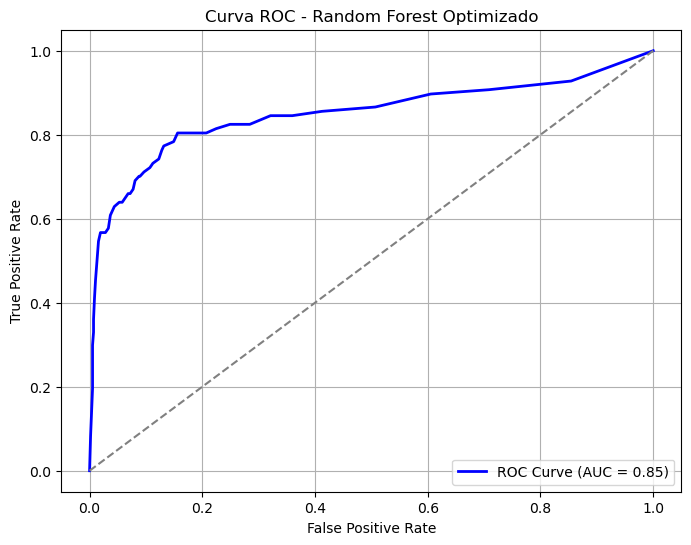

In [32]:
# 1. Definir el modelo base de Random Forest
# Se establece un clasificador Random Forest con evaluación OOB (out-of-bag) 
rf_base = RandomForestClassifier(oob_score=True, random_state=42, n_jobs=-1)

# 2. Definir la grilla de hiperparámetros para la búsqueda en grilla (GridSearchCV)
param_grid = {
    "n_estimators": np.arange(50, 201, 10),  # Número de árboles entre 50 y 200 en incrementos de 10
    "max_features": ["sqrt", "log2", None]}  # Número de características evaluadas en cada división del árbol


# 3. Configurar la búsqueda en grilla con validación cruzada
grid_search = GridSearchCV(
    estimator=rf_base,       # Modelo base Random Forest
    param_grid=param_grid,   # Hiperparámetros definidos
    cv=5,                    # Validación cruzada con 5 divisiones
    scoring="accuracy",       # Evaluar con precisión
    n_jobs=-1,               # Paralelización con múltiples núcleos
    verbose=1)                # Muestra el progreso de la búsqueda


# 4. Ejecutar la búsqueda de hiperparámetros en el conjunto de entrenamiento
grid_search.fit(X_train_balanced, y_train_balanced)

# 5. Obtener los mejores hiperparámetros encontrados
best_params = grid_search.best_params_  # Diccionario con los mejores valores de hiperparámetros
best_rf_model = grid_search.best_estimator_  # Modelo con la mejor configuración encontrada

# 6. Evaluar el desempeño con la métrica OOB (fuera de bolsa)
oob_accuracy = best_rf_model.oob_score_  # Precisión obtenida en la muestra OOB

# 7. Realizar predicciones en el conjunto de prueba
y_test_pred = best_rf_model.predict(X_test)

# 8. Evaluar las métricas de desempeño del modelo optimizado
test_accuracy = accuracy_score(y_test, y_test_pred)  # Precisión en datos de prueba
classification_rep = classification_report(y_test, y_test_pred, output_dict=True)  # Reporte de clasificación detallado
conf_matrix = confusion_matrix(y_test, y_test_pred)  # Matriz de confusión

# 9. Identificar las 4 características más importantes en la predicción del modelo
feature_importances = pd.DataFrame({
    'Feature': X_train_balanced.columns,  # Nombres de las características
    'Importance': best_rf_model.feature_importances_  # Importancia calculada por Random Forest
}).sort_values(by="Importance", ascending=False).head(4)  # Seleccionar las 4 más relevantes

# 10. Calcular la curva ROC y el AUC (Área bajo la curva)
y_test_proba = best_rf_model.predict_proba(X_test)[:, 1]  # Obtener probabilidades de la clase positiva
fpr, tpr, _ = roc_curve(y_test, y_test_proba)  # Calcular los valores de la curva ROC
roc_auc = auc(fpr, tpr)  # Calcular el AUC (Area Under Curve)


# Guardar resultados
rf_grid_results = {
    "Best Hyperparameters": best_params,
    "OOB Accuracy": oob_accuracy,
    "Test Accuracy": test_accuracy,
    "Matriz de Confusión": pd.DataFrame(conf_matrix, 
                                        index=["Real: No Churn", "Real: Churn"], 
                                        columns=["Predicho: No Churn", "Predicho: Churn"]),
    "Reporte de Clasificación": pd.DataFrame(classification_rep).transpose(),
    "Top 4 Características Más Importantes": feature_importances,
    "ROC Curve Data": (fpr, tpr, roc_auc)}

# Mostrar los resultados
print("\n **Resultados del Modelo Random Forest con Búsqueda de Hiperparámetros** ")
print(f"\n **Mejores Hiperparámetros**: {rf_grid_results['Best Hyperparameters']}")
print(f" **Precisión OOB**: {rf_grid_results['OOB Accuracy']:.4f}")
print(f" **Precisión en el conjunto de prueba**: {rf_grid_results['Test Accuracy']:.4f}\n")

print("\n **Matriz de Confusión**:")
display(rf_grid_results["Matriz de Confusión"])

print("\n **Reporte de Clasificación**:")
display(rf_grid_results["Reporte de Clasificación"])

print("\n **Las 4 Características Más Importantes**:")
display(rf_grid_results["Top 4 Características Más Importantes"])

# Graficar la curva ROC
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")  # Línea diagonal
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC - Random Forest Optimizado")
plt.legend(loc="lower right")
plt.grid()
plt.show()


#### **<span style="color:purple">Análisis de Resultados del Modelo Random Forest con Búsqueda de Hiperparámetros</span>** 

**Resumen del Modelo**

Este modelo de **Random Forest** fue optimizado mediante **búsqueda en grilla (Grid Search)** para encontrar los mejores hiperparámetros y mejorar su rendimiento. Se evaluaron 48 configuraciones diferentes con validación cruzada de 5 folds, totalizando **240 modelos evaluados**.

---

**<span style="color:teal">Resultados del Modelo Random Forest con Búsqueda de Hiperparámetros</span>**

1. **Mejores Hiperparámetros Encontrados**
    - **max_features: 'sqrt'** (selecciona la raíz cuadrada del número total de características en cada división del árbol).
    - **n_estimators: 50** (se utilizaron 50 árboles en el bosque de decisión).

2. **Precisión del Modelo**

    - **Precisión OOB (Out-of-Bag)**: **93.20%** (evaluación interna sin usar el conjunto de prueba).
    - **Precisión en el conjunto de prueba**: **88.16%** (evaluación sobre los datos reales de prueba).

3. **Matriz de Confusión**

|                 | Predicho: No Churn | Predicho: Churn |
|---------------|------------------|---------------|
| **Real: No Churn**  | 520 | 50 |
| **Real: Churn**  | 29 | 68 |

4. **Reporte de Clasificación**

| Clase | Precisión | Recall | F1-score | Soporte |
|---|---|---|---|---|
| **0 (No Churn)** | 94.72% | 91.23% | 92.94% | 570 |
| **1 (Churn)** | 57.63% | 70.10% | 63.26% | 97 |
| **Precisión Global (Accuracy)** | 88.16% | 88.16% | 88.16% | 667 |
| **Promedio Macro** | 76.17% | 80.67% | 78.09% | 667 |
| **Promedio Ponderado** | 89.32% | 88.16% | 88.62% | 667 |

5. **Las 4 Características Más Importantes**
   
| Feature | Importancia |
|---|---|
| **ContractRenewal** | 19.15% |
| **MonthlyCharge** | 16.39% |
| **DayMins** | 16.26% |
| **CustServCalls** | 13.51% |

---

**<span style="color:teal">Análisis de Resultados</span>**

1. **Evaluación General del Modelo**

    - **La precisión OOB del 93.20% indica que el modelo generaliza bien**, ya que esta métrica es una validación interna sobre el conjunto de entrenamiento.
    - **La precisión en prueba del 88.16%** demuestra un buen desempeño en datos reales.

2. **Impacto en la Detección de Churn**

- El *recall* para la clase **Churn (1) es del 70.10%**, lo que indica que el modelo logra identificar la mayoría de los clientes que cancelarán el servicio.
- La **precisión en la clase Churn (57.63%)** muestra que el modelo aún tiene falsos positivos, clasificando erróneamente clientes como propensos a cancelar.

3. **Interpretación de la Matriz de Confusión**

- **520 clientes fueron correctamente clasificados como No Churn**, pero **50 fueron clasificados erróneamente como Churn**.
- **68 clientes fueron correctamente clasificados como Churn**, mientras que **29 clientes que cancelaron el servicio fueron mal clasificados como No Churn**.

4. **Análisis de las Características Más Importantes**

- Las variables más influyentes en la predicción de Churn son:
    1. **ContractRenewal (19.15%)**: La renovación de contrato es el factor más importante para retener clientes.
    2. **MonthlyCharge (16.39%)**: Un costo mensual alto podría aumentar la probabilidad de cancelación.
    3. **DayMins (16.26%)**: Clientes con mayor uso de minutos diurnos pueden ser más propensos a cambios.
    4. **CustServCalls (13.51%)**: Los clientes que hacen más llamadas a servicio al cliente pueden estar insatisfechos y con mayor probabilidad de cancelar.

---

**<span style="color:teal">Curva ROC y AUC</span>**

- **La curva ROC muestra el rendimiento del modelo en términos de tasa de falsos positivos y verdaderos positivos.**
- **El AUC = 0.85** indica que el modelo tiene una buena capacidad para distinguir entre clientes que cancelarán y los que no.
- **Una AUC de 0.85** sugiere que el modelo es altamente efectivo para predecir Churn.

---

**<span style="color:teal">Conclusión y Recomendaciones</span>**

- **El modelo de Random Forest optimizado mejora la predicción de Churn con una precisión del 88.16%.**
- **La precisión OOB del 93.20% indica que el modelo generaliza bien sin sobreajustarse.**
- **La detección de clientes que cancelan ha mejorado con un recall de 70.10%.**

- **Recomendaciones para mejorar el modelo:**
    - **Aumentar el número de árboles (n_estimators) para mejorar la estabilidad del modelo.**
    - **Optimizar 'max_depth' y 'min_samples_split' para un mejor balance entre sesgo y varianza.**
    - **Explorar técnicas de balanceo adicionales** para mejorar la detección de clientes que cancelan.
    - **Comparar con modelos Boosting (XGBoost, AdaBoost)** para evaluar posibles mejoras en el rendimiento.

---
---

### **<span style="color:orange">Punto 7.- Análisis de los 15 Clientes con Mayor Riesgo de Churn</span>**

Este código utiliza el **modelo Random Forest optimizado** para identificar los **15 clientes con mayor riesgo de churn** (cancelación del servicio). Se basa en las probabilidades de salida predichas por el modelo y ordena los clientes según su riesgo de abandono.

**Pasos del Código**

1. **Obtener las probabilidades de churn** usando el modelo Random Forest entrenado.  
2. **Crear un DataFrame con los clientes** y sus respectivas probabilidades de churn.  
3. **Ordenar los clientes en orden descendente** según su riesgo de churn.
4. **Seleccionar los 15 clientes con mayor probabilidad** de cancelar el servicio.  
5. **Mostrar los resultados en un formato estructurado.**  

---

**Resultados: Top 15 Clientes con Mayor Riesgo de Churn**

| Cliente_ID | Probabilidad de Churn |
|------------|----------------------|
| 331        | 1.00  |
| 2794       | 1.00  |
| 2874       | 1.00  |
| 2099       | 1.00  |
| 112        | 1.00  |
| 306        | 1.00  |
| 3205       | 1.00  |
| 3272       | 1.00  |
| 1934       | 1.00  |
| 2724       | 0.98  |
| 989        | 0.98  |
| 894        | 0.98  |
| 3280       | 0.98  |
| 2824       | 0.98  |
| 1095       | 0.98  |

---

**<span style="color:teal">Análisis de los Resultados</span>**

1. **Alta Precisión del Modelo:** Los clientes con **probabilidad 1.00** de churn son aquellos que el modelo predice con certeza que cancelarán su servicio.  
2. **Clientes con riesgo intermedio:** Algunos clientes tienen **probabilidades cercanas a 0.98**, lo que indica que podrían cancelar en un futuro cercano.  
3. **Estrategia para Retención:** Estos resultados pueden ser utilizados para **aplicar estrategias preventivas** y evitar la pérdida de clientes.  

---

**<span style="color:teal">Conclusión y Recomendaciones</span>**

- **El modelo identifica correctamente a los clientes con mayor riesgo de cancelación, lo que permite a la empresa tomar medidas proactivas para retenerlos.**  
- **Se recomienda analizar en detalle las características de estos clientes y explorar estrategias como descuentos, mejoras en el servicio o campañas de fidelización.**  


In [34]:
# Verificar que el modelo optimizado de Random Forest está definido
if 'best_rf_model' in locals():
    # Obtener las probabilidades de churn con el modelo Random Forest optimizado
    y_test_proba = best_rf_model.predict_proba(X_test)[:, 1]  # Probabilidad de ser "Churn" (Clase 1)

    # Crear un DataFrame con los resultados
    churn_risk_df = pd.DataFrame({
        "Cliente_ID": y_test.index,  # Índices de los clientes
        "Probabilidad_Churn": y_test_proba
    })

    # Ordenar por mayor probabilidad de churn y seleccionar los 15 clientes con mayor riesgo
    top_15_churn_risk = churn_risk_df.sort_values(by="Probabilidad_Churn", ascending=False).head(15)

    # Mostrar los resultados de forma organizada
    print("\n**Top 15 Clientes con Mayor Riesgo de Churn**\n")
    print(top_15_churn_risk.to_string(index=False))
else:
    print("Error: El modelo 'best_rf_model' no está definido. Asegúrate de haber ejecutado el entrenamiento previamente.")




**Top 15 Clientes con Mayor Riesgo de Churn**

 Cliente_ID  Probabilidad_Churn
        331                1.00
       2794                1.00
       2874                1.00
       2099                1.00
        112                1.00
        306                1.00
       3205                1.00
       3272                1.00
       1934                1.00
       2724                0.98
        989                0.98
        894                0.98
       3280                0.98
       2824                0.98
       1095                0.98
